<a href="https://colab.research.google.com/github/M-Gloria/Insurance-Claim-Analysis-Demographic-Health-Factors/blob/main/Insurance_Claim_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction: 

The dataset used is *Insurance Claim Analysis: Demographic and Health Factors*. It provides information on insurance claims and the demographic information of patients that make the claims. The dataset is located on Kaggle. 

The question asked when analyzing this dataset is "How does pateint demographics affect the amount made in insurance claims?" 

There was a focus on patient BMI's, patients with diabetes, and patient claims. The following are the hypothesis that are tested:

*Null Hypothesis 1*: There is no correlation between patients BMI and the amount made in insurance claims 

*Alternative Hypothesis 1*: There is a significant correlation between patien BMI's and the amount made in insurance claims

*Null Hypothesis 2*: There is no difference in the average amount in insurance claims for patients that have diabetes as opposed to those who don’t.  
*Alternative Hypothesis 2*: There is a significant difference between patients that have diabetes and the amount made in claims as opposed to patients that do not have diabetes  




Link to csv: https://drive.google.com/file/d/1xHhRVHU4pQYlnPjp6_nAPhdjHZV4tgUY/view?usp=share_link

Import Modules

In [ ]:
import math 
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()

Mount GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Bring in Data.
View Dataset features.

In [ ]:
insurance = pd.read_csv('/content/gdrive/My Drive/insurance.csv')
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


Remove null values

In [ ]:
insurance.dropna()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


Explore Insurance Dataset

In [ ]:
insurance.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
insurance.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


Explore the correlation between patient BMI's and patient Claims

Null Hypothesis 1:
It is hypothesized that there is no correlation between patient BMI's and the amount in insurance claims.

<Axes: xlabel='bmi', ylabel='claim'>

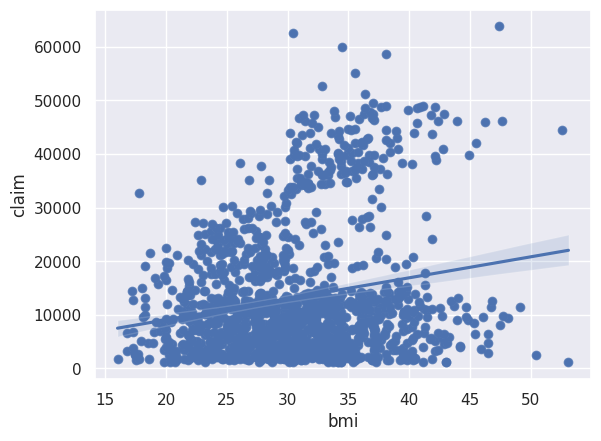

In [ ]:
#Create scatterplot visual
sns.scatterplot(x= 'bmi', y= 'claim', data=insurance) 
sns.regplot(x= 'bmi', y= 'claim', data=insurance)

Conduct Analysis

In [ ]:
# Run pearsonr test
stats.pearsonr(insurance['claim'],insurance['bmi'])

PearsonRResult(statistic=0.19740133652071146, pvalue=3.07228503031034e-13)

Reject the null hypothesis: There is a statistically significant relationship between patient BMI's and patient claims. 

Explore the difference between patients with and without diabetes and the average amount in claims.

Null Hypothesis 2:
It is hypothesized that there is no difference in the average amount of claims for patienst with diabetes as opposed to patients who do not have diabetes. 

In [ ]:
# Split the data for a t-test
insurance_y = insurance.loc[insurance['diabetic'] == 'Yes']
insurance_n = insurance.loc[insurance['diabetic'] == 'No']

In [ ]:
insurance_y.info()
insurance_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          642 non-null    int64  
 1   PatientID      642 non-null    int64  
 2   age            639 non-null    float64
 3   gender         642 non-null    object 
 4   bmi            642 non-null    float64
 5   bloodpressure  642 non-null    int64  
 6   diabetic       642 non-null    object 
 7   children       642 non-null    int64  
 8   smoker         642 non-null    object 
 9   region         640 non-null    object 
 10  claim          642 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 60.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 1 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          698 non-null    int64  
 1   PatientID      6

In [ ]:
insurance_y.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,642.000000,642.000000,639.000000,642.000000,642.000000,642.000000,642.000000
mean,667.700935,668.700935,37.776213,30.433645,94.006231,1.074766,13142.624346
std,388.674267,388.674267,10.967107,6.112805,11.650124,1.195683,11935.356153
min,0.000000,1.000000,18.000000,16.800000,80.000000,0.000000,1121.870000
25%,322.250000,323.250000,29.000000,25.825000,86.000000,0.000000,4563.177500
50%,674.000000,675.000000,37.000000,30.150000,92.000000,1.000000,9421.970000
75%,995.750000,996.750000,46.000000,34.200000,99.000000,2.000000,16107.757500
max,1337.000000,1338.000000,60.000000,50.400000,140.000000,5.000000,60021.400000


In [ ]:
insurance_n.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,698.000000,698.000000,696.000000,698.000000,698.000000,698.000000,698.000000
mean,671.154728,672.154728,38.356322,30.885387,94.296562,1.110315,13354.031991
std,385.665274,385.665274,11.226871,6.097506,11.239509,1.214750,12275.376160
min,1.000000,2.000000,18.000000,16.000000,80.000000,0.000000,1131.510000
25%,352.250000,353.250000,29.000000,26.700000,86.000000,0.000000,4891.187500
50%,663.000000,664.000000,38.000000,30.600000,93.000000,1.000000,9274.180000
75%,1007.750000,1008.750000,47.000000,34.900000,99.000000,2.000000,16862.792500
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


<Axes: xlabel='diabetic', ylabel='claim'>

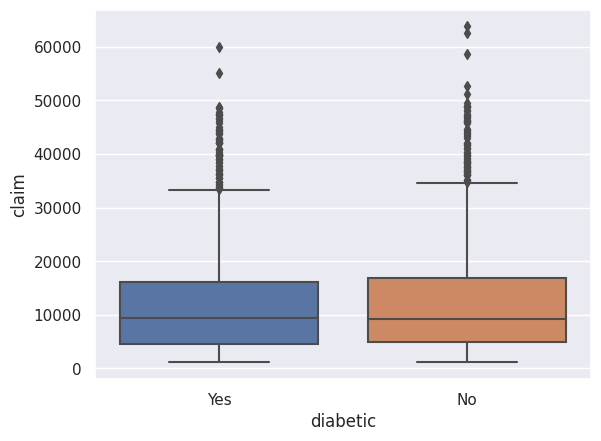

In [ ]:
# Create boxplot visual
sns.boxplot(x= 'diabetic', y= 'claim', data=insurance)

<Axes: xlabel='claim', ylabel='Count'>

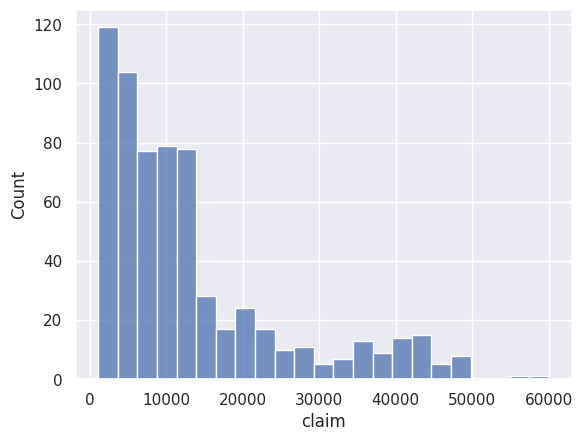

In [ ]:
#Create histogram visual for patients with diabetes.
sns.histplot(insurance_y["claim"])

<Axes: xlabel='claim', ylabel='Count'>

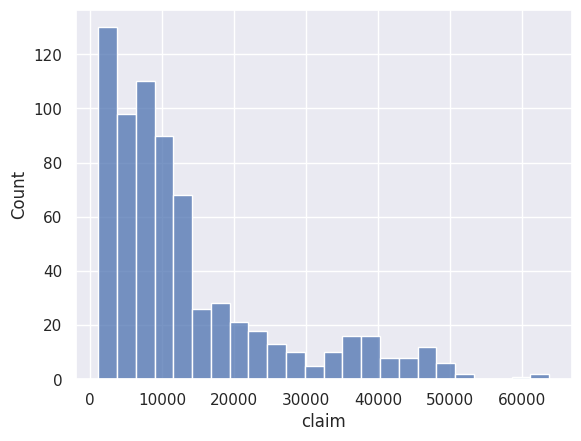

In [ ]:
# Create histogram visual for patients without diabetes.
sns.histplot(insurance_n["claim"])

Conduct Analysis.

In [ ]:
# Run two sample t-test
stats.ttest_ind(insurance_y['claim'], insurance_n['claim'])

Ttest_indResult(statistic=-0.3191447336786516, pvalue=0.7496665799159533)

Fail to reject the null hypothesis: The relationship between patients with and without diabetes and patient claims are not statistically significant. 

Conclusion: 

  While analyzing this dataset and the correlation between various patient demographics and patient claims, a Pearsonr Test and TTest were used to reach a conclusion. 

  The first hypothesis tested was: "There is no correlation between patients BMI and the amount made in insurance claims". This hypothesis, tested with a Pearsonr test, was rejected. With a p value of 3.07228503031034e-13, there is a statistically significant correlation between patient BMI's and Claims. 

  The second hypothesis tested was: "There is no difference in the average amount of claims for patients with diabetes as opposed to patients who do not have diabetes". They failed to reject the null hypothesis, which was tested with a TTest. With a p value of 0.7496665799159533, there is not a statistically significant difference between patients with or without diabetes and pateint claims. 

  With these results, Insurance comapnies can continue to test various patient demographics that are collected for a better understanding of which patient type affects the amount they receive in claims. One of the demographics tested, patient BMI, proved to have a positive effect on claims. The second demographic tested, patients with diabetes, proved to not have an effect on claims made. This information can be helpufl in many ways. A few include, it can give insight to how they market themselves. This information can also allow them to have a better understanding of the kind of resources provided to patients. 